<a href="https://colab.research.google.com/github/thimontenegro/Dataquest/blob/master/limpeza_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpeza de Dados
Até agora, aprendemos como usar a biblioteca do pandas e como criar visualizações com conjuntos de dados que não exigem muita limpeza. No entanto, a maioria dos conjuntos de dados na vida real exige limpeza e manipulação extensivas para extrair informações importantes. De fato, a Forbes estima que os cientistas de dados gastam cerca de 60% do tempo limpando e organizando dados, por isso é fundamental poder manipular dados de maneira rápida e eficiente.

Primeiramente vamos inicializar nossos dados.


In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv('World_Happiness_2015.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Vamos aprender como executar diferentes tipos de agregações, aplicar uma operação estatística a grupos de nossos dados e criar visualizações como a acima.

Lembre-se de que no curso Fundamentos do Pandas, aprendemos uma maneira de usar loops para agregação. Nosso processo ficou assim:

*   Identificar cada grupo único no dataset
*   Em cada grupo:
      *   Selecionar as colunas correspondentes
      *   Calcular a média dessas colunas.





In [0]:
mean_happiness = {}
region = df['Region'].unique()

for r in region:
  region_group = df[df['Region'] == r]
  region_mean = region_group['Happiness Score'].mean()
  mean_happiness[r] = region_mean

mean_happiness


{'Australia and New Zealand': 7.285,
 'Central and Eastern Europe': 5.332931034482758,
 'Eastern Asia': 5.626166666666666,
 'Latin America and Caribbean': 6.144681818181818,
 'Middle East and Northern Africa': 5.406899999999999,
 'North America': 7.273,
 'Southeastern Asia': 5.317444444444445,
 'Southern Asia': 4.580857142857143,
 'Sub-Saharan Africa': 4.202800000000001,
 'Western Europe': 6.689619047619048}

# Operação Groupby
Vamos dividir o código que escrevemos na tela anterior em três etapas:


1.   Divida o quadro de dados em grupos.
2.   Aplique uma função a cada grupo.
3.  Combine os resultados em uma estrutura de dados.



```
# mean_happiness = {}
regions = happiness2015['Region'].unique()

for r in regions:
    #1. Split the dataframe into groups.
    region_group = happiness2015[happiness2015['Region'] == r]
    #2. Apply a function to each group
```

A operação groupby, funciona da forma 'split-apply-combine' no dataframe, mas é feito de duas formas:

1.  Cria um objeto groupby
2.  Chama a função groupby

O Objeto GroupBy, distinto de um objeto de quadro de dados ou de série, permite dividir o quadro de dados em grupos, mas apenas em um sentido abstrato. Nada é realmente calculado até que uma função seja chamada no objeto GroupBy.

O primeiro passo em uma operação de groupby
é criar o objeto groupby, para isso utilizamos:


```
# df.groupby('col')
```
Onde 'col' é a coluna que queremos agrupar no nosso conjunto de dados.
Também podemos agrupar múltiplas colunas, passando uma lista no groupby.



In [0]:
grouped = df.groupby('Region')
grouped

Essa mensagem gerada não é um erro!!
É apenas um objeto do tipo Groupby que foi retornado!
Ele retorna porque fica esperando uma função de agregação!


Nós podemos utilizar o atribributo groupby.groups para obtermos mais informações dos objeto Groupby.

In [0]:
grouped = df.groupby('Region')
grouped.groups

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'),
 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
              72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
             126, 129, 133],
            dtype='int64'),
 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'),
 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118],
            dtype='int64'),
 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
             106, 107, 109, 111, 134, 135, 155],
            dtype='int64'),
 'North America': Int64Index([4, 14], dtype='int64'),
 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'),
 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'),
 'Sub-Saharan

Se perceber retorna um dicionario e que cada chave corresponde a sua região.


In [0]:
df.iloc[10:12]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
10,Israel,Middle East and Northern Africa,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
11,Costa Rica,Latin America and Caribbean,12,7.226,0.04454,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,3.17728


In [0]:
grouped = df.groupby('Region')
na = df.iloc[[4,14]]
na_group = grouped.get_group('North America')
equal_na = na_group == na
equal_na

latin = [ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118]
la = df.iloc[latin]
latin_group = grouped.get_group('Latin America and Caribbean')
equal_latin = latin_group == la 
equal_latin

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
11,True,True,True,True,True,True,True,True,True,True,True,True
13,True,True,True,True,True,True,True,True,True,True,True,True
15,True,True,True,True,True,True,True,True,True,True,True,True
22,True,True,True,True,True,True,True,True,True,True,True,True
24,True,True,True,True,True,True,True,True,True,True,True,True
26,True,True,True,True,True,True,True,True,True,True,True,True
29,True,True,True,True,True,True,True,True,True,True,True,True
31,True,True,True,True,True,True,True,True,True,True,True,True
32,True,True,True,True,True,True,True,True,True,True,True,True
39,True,True,True,True,True,True,True,True,True,True,True,True


Existe diveras formas de agregação de dados:

Método - Descrição: 

*   mean() - Calcula a média do grupo
*   Sum() - Calcula a soma total daquele grupo
*   Size() - Calcula o tamanho daquele grupo
*  Count() - Conta o número de ocorrências de valores naquele grupo
* Min() - Retorna o valor mínimo daquele grupo
* Max() - Retorna o maior valor daquele grupo






In [0]:
grouped = df.groupby('Region')
size = grouped.size()
means = grouped.mean()

print('O tamanho por região é: ' + str(size))
print('--------------------------------------')
print('A média por região é: ' + str(means))

O tamanho por região é: Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64
--------------------------------------
A média por região é:                                  Happiness Rank  ...  Dystopia Residual
Region                                           ...                   
Australia and New Zealand              9.500000  ...           2.265355
Central and Eastern Europe            79.000000  ...           2.021400
Eastern Asia                          64.500000  ...           1.681607
Latin America and Caribbean           46.909091  ...           2.622577
Middle East and Northern Africa       77.600000  ...           1.980009
North Ameri


Você deve ter notado que a região aparece em uma linha diferente dos demais nomes da coluna. Como agrupamos o quadro de dados por região, os valores exclusivos em Region são usados ​​como índice. Até agora, trabalhamos principalmente com quadros de dados com um índice numérico.

Em alguns casos, queremos agregar mais do que uma coluna em particular. Podemos passar uma lista de colunas no groupby.

In [0]:
grouped = df.groupby('Region')
happy_region = grouped['Happiness Score'].mean().sort_values(ascending = False)
happy_region

Region
Australia and New Zealand          7.285000
North America                      7.273000
Western Europe                     6.689619
Latin America and Caribbean        6.144682
Eastern Asia                       5.626167
Middle East and Northern Africa    5.406900
Central and Eastern Europe         5.332931
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Name: Happiness Score, dtype: float64

E se quisermos aplicar mais do que um tipo de agregação?

Para isso basta utilizar o método Groupby.agg() para realizar mais do que uma forma de agregar.

A sintaxe é:



```
# groupby.agg([func_1,func_2])
```
Nós utilizamos e passamos no método agg, funções do Numpy como np.mean, np.max...





In [0]:
import numpy as np

group = df.groupby('Region')
happy_group = group['Happiness Score']

happy_mean_max_min = group.agg([np.mean, np.max, np.min])
happy_mean_max_min

Happiness Rank       ... Dystopia Residual         
                                          mean amax  ...              amax     amin
Region                                               ...                           
Australia and New Zealand             9.500000   10  ...           2.26646  2.26425
Central and Eastern Europe           79.000000  134  ...           3.10712  0.89991
Eastern Asia                         64.500000  100  ...           2.32323  0.65429
Latin America and Caribbean          46.909091  119  ...           3.60214  1.21305
Middle East and Northern Africa      77.600000  156  ...           3.08854  0.32858
North America                        10.000000   15  ...           2.51011  2.45176
Southeastern Asia                    81.222222  145  ...           2.31945  0.98195
Southern Asia                       113.142857  153  ...           3.10709  0.67108
Sub-Saharan Africa                  127.900000  158  ...           3.05137  0.67042
Western Europe                       29.523810  102  ...           2.70201  1.26462

[10 rows x 30 columns]

Outra forma de realizar agregações é utilizar uma pivot_table.
Utilizando os índices e valores podemos utilizar no método do pivot_table.

DataFrame.pivot_table() realiza as mesmas agregações que o groupby e torna o código seja mais legivel.


Exemplo de um código com pivot_table
```
# happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean)
```

Lembre-se de que esse método retorna um dataframe, para que a filtragem e os métodos normais possam ser aplicados ao resultado. Por exemplo, vamos usar o método DataFrame.plot () para criar uma visualização.



```
# pv_happiness = happiness2015.pivot_table('Happiness Score', 'Region')
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)
```



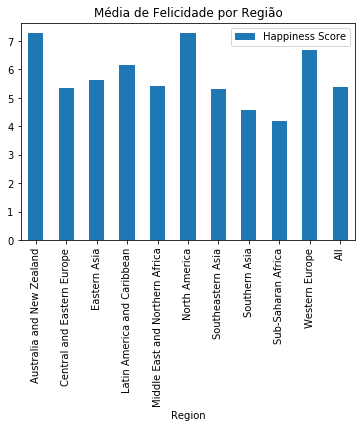

In [0]:
pv_happiness = df.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
pv_happiness.plot(kind = 'bar',title = 'Média de Felicidade por Região', legend = 'False', xlim=(0,10))
world_mean_happiness = df['Happiness Score'].mean()

In [0]:
group = df.groupby('Region')[['Happiness Score', 'Economy (GDP per Capita)']]

happy_eco_stats = group.agg([np.min, np.mean, np.max])
pv_happy_eco_stats = df.pivot_table(['Happiness Score','Economy (GDP per Capita)'], 'Region', aggfunc = [np.min,np.mean, np.max], margins = True)
happy_eco_stats 

Happiness Score            ... Economy (GDP per Capita)         
                                           amin      mean  ...                     mean     amax
Region                                                     ...                                  
Australia and New Zealand                 7.284  7.285000  ...                 1.291880  1.33358
Central and Eastern Europe                4.218  5.332931  ...                 0.942438  1.18498
Eastern Asia                              4.874  5.626167  ...                 1.151780  1.38604
Latin America and Caribbean               4.518  6.144682  ...                 0.876815  1.21183
Middle East and Northern Africa           3.006  5.406900  ...                 1.066973  1.69042
North America                             7.119  7.273000  ...                 1.360400  1.39451
Southeastern Asia                         3.819  5.317444  ...                 0.789054  1.52186
Southern Asia                             3.575  4.580857  ...                 0.560486  0.83524
Sub-Saharan Africa                        2.839  4.202800  ...                 0.380473  1.06024
Western Europe                            4.857  6.689619  ...                 1.298596  1.56391

[10 rows x 6 columns]

In [0]:
pv_happy_eco_stats

amin  ...            amax
                                Economy (GDP per Capita)  ... Happiness Score
Region                                                    ...                
Australia and New Zealand                        1.25018  ...           7.286
Central and Eastern Europe                       0.39047  ...           6.505
Eastern Asia                                     0.82819  ...           6.298
Latin America and Caribbean                      0.26673  ...           7.226
Middle East and Northern Africa                  0.54649  ...           7.278
North America                                    1.32629  ...           7.427
Southeastern Asia                                0.27108  ...           6.798
Southern Asia                                    0.31982  ...           5.253
Sub-Saharan Africa                               0.00000  ...           5.477
Western Europe                                   1.15406  ...           7.587
All                                              0.00000  ...           7.587

[11 rows x 6 columns]

# Combinando Dados com Pandas!


Para combinar dados, utilizamos a função pd.concat().

A função concat combina dois dataframes em um único, podemos fazer de duas formas:



1.   Stacked: Axis = 0 (Opção padrão, onde é por coluna, agrupa uma em cima do outra)
2.   Side by Side: Axis = 1. Como o nome disse, vai realizar o agrupamento por linha.

Utilizamos o método atráves da sintaxe:



```
# pd.concat([dataframe1, dataframe2])
```












In [0]:
import pandas as pd

df_2015 = pd.read_csv('World_Happiness_2015.csv')
df_2016 = pd.read_csv('World_Happiness_2016.csv')
df_2017 = pd.read_csv('World_Happiness_2017.csv')
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017

In [0]:
head_2015 = df_2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = df_2016[['Country','Happiness Score', 'Year']].head(3)
concat_axis0 = pd.concat([head_2015, head_2016], axis = 0)
concat_axis0


,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


In [0]:
concat_axis1 = pd.concat([head_2015, head_2016], axis = 1)
concat_axis1

,Country,Happiness Score,Year,Country,Happiness Score,Year
0,Switzerland,7.587,2015,Denmark,7.526,2016
1,Iceland,7.561,2015,Switzerland,7.509,2016
2,Denmark,7.527,2015,Iceland,7.501,2016



Para fazer o concat de dois dataframes, ambos precisam ter o mesmo tamanho, para isso basta rodar dataframe.shape.
Mas o que acontece se realizamos a concatenação de dataframes com tamanhos diferentes?

In [0]:
head_2015 = df_2015[['Country','Happiness Score', 'Year']].head(5)
head_2016 = df_2016[['Country','Happiness Score', 'Year']].head(4)
concat = pd.concat([head_2015, head_2016], axis = 0)
concat

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
3,Norway,7.522,2015
4,Canada,7.427,2015
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016
3,Norway,7.498,2016


Ele gera um NaN, que afirma que o dado não existe. Isso pode ser gera um problema futuro quando for realizar alguma operação.
Por default, a função concat mantém todos os dados sem se importar se eles não existem.

Além disso, observe novamente que os índices do dataframe originais não foram alterados. Se os índices não forem significativos, pode ser melhor redefini-los. Isso é especialmente verdadeiro quando criamos índices duplicados, porque eles podem causar erros quando executamos outras tarefas de limpeza de dados.

Por isso, a função concat possui o parametro, ignore_index que pode ser utilizado para limpar os índices e reinicar o resultado.


In [0]:
head_2016 = df_2016[['Country','Happiness Score', 'Year']].head(4)
head_2015 = df_2015[['Country','Happiness Score', 'Year']].head(5)
concat_update = pd.concat([head_2015, head_2016], axis = 0, ignore_index = True)
concat_update

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
3,Norway,7.522,2015
4,Canada,7.427,2015
5,Denmark,7.526,2016
6,Switzerland,7.509,2016
7,Iceland,7.501,2016
8,Norway,7.498,2016


## Função Merge
A diferença entre merge e concat, é que a função merge só combina os dataframes de forma horizontal (axis = 1) e só pode combinar dois dataframes por vez.
Contudo, podemos utilizar a função merge quando queremos combinar dataframes com muitooos dados pois a função merge fornece um melhor desempenho computacional e maior flexibilidade.

Com a função merge, precisamos combinar os dataframes através de uma **key**, chave,
que dividam o mesmo índice ou coluna.
Quando escolhemos a chave, uma boa prática é utilizar chaves que possuam um valor único para evitar dados dúplicados!

*PS: Pense as chaves como forma de linkar os dois dataframes!*

A sintaxe é:



```
# pd.merge(left = df1, right = df2, on = 'col_name')

on é a chave onde queremos juntar os dois dataframes
```





In [0]:
three_2015 = df_2015[['Country','Happiness Score','Year']].iloc[2:5]
three_2016 = df_2016[['Country','Happiness Score','Year']].iloc[2:5]
merged_df = pd.merge(left=three_2015, right=three_2016, on='Country')
merged_df

,Country,Happiness Score_x,Year_x,Happiness Score_y,Year_y
0,Norway,7.522,2015,7.498,2016


O único país que temos o resultado é a Noruega, esta combinação de dados é chamada de inner join, ou interseção dos dados.
Onde retorna a interseção das chaves ou os elementos que aparecem nos dois dataframes através de uma chave comum.

Existe 4 formas de juntas os dados:



1.   Inner Join: 
Inclui apenas elementos que aparecem nos dois quadros de dados com uma chave comum.
2.   Outer: 
inclui todos os dados de ambos os quadros de dados.
3. Left: Inclui todas as linhas do quadro de dados "esquerdo" junto com todas as linhas do quadro de dados "direito" com uma chave comum; o resultado retém todas as colunas de ambos os quadros de dados originais.
4. Inclui todas as linhas do quadro de dados "direito" junto com todas as linhas do quadro de dados "esquerdo" com uma chave comum; o resultado retém todas as colunas de ambos os quadros de dados originais.



In [0]:
merged = pd.merge(left = three_2015, right = three_2016, on ='Country')
merged_left = pd.merge(left = three_2015, right = three_2016, how = 'left', on = 'Country')
merged_left

,Country,Happiness Score_x,Year_x,Happiness Score_y,Year_y
0,Denmark,7.527,2015,NaN,NaN
1,Norway,7.522,2015,7.498,2016.0
2,Canada,7.427,2015,NaN,NaN


Percebemos que quando realizamso a função de merge, ele adiciona sufixos como Score_x, Year_x. Para isso vamos atualizar os sufixos!


In [0]:
merged_update_sufixes = pd.merge(left = three_2015, right = three_2016, how = 'left', on = 'Country', suffixes = ('_2015', '_2016'))
merged_update_sufixes

,Country,Happiness Score_2015,Year_2015,Happiness Score_2016,Year_2016
0,Denmark,7.527,2015,NaN,NaN
1,Norway,7.522,2015,7.498,2016.0
2,Canada,7.427,2015,NaN,NaN


Agora se queremos dados da mesma distribuição e ver o qual a variância?
Basta agrupa-los em um conjunto de dados e realizar o plot dos gráficos através da função de pivot_table.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


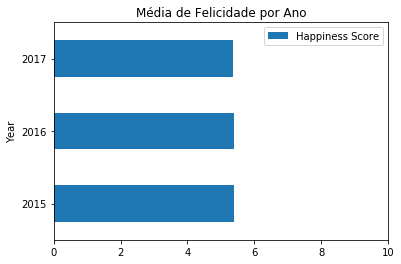

In [0]:
import numpy as np
import matplotlib.pyplot as plt


df_2017.rename(columns = {'Happiness.Score': 'Happiness Score'}, inplace = True)
combined = pd.concat([df_2015, df_2016, df_2017])
pt_combined = combined.pivot_table(index = 'Year', values = 'Happiness Score', aggfunc = np.mean)
pt_combined.plot(kind = 'barh', title = 'Média de Felicidade por Ano', xlim=(0,10))
plt.show()


# Transformando dados com Pandas


In [0]:
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }
df_2015 = df_2015.rename(mapping, axis = 1)
df_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015


Embora o pandas forneça muitas funções integradas para tarefas comuns de limpeza de dados, nesse caso, a transformação que precisamos executar é tão específica para nossos dados que ela não existe. Felizmente, o pandas possui alguns métodos que podem ser usados ​​para aplicar uma função personalizada como a acima aos nossos dados, começando pelos dois métodos a seguir:


1.   Series.map() 
2.   Series.apply()


Ambos os métodos acima aplicam uma função elemento a elemento a uma coluna. Quando dizemos elemento a elemento, queremos dizer que passamos a função um valor na série de cada vez e ela realiza algum tipo de transformação.



```
# series.apply(nome_funcao)
  series.map(nome_funcao)
```

Observe que esses métodos assumem uma função como parâmetro. Como estamos usando a função como parâmetro, passamos para a função sem os parênteses. Por exemplo, se estivéssemos trabalhando com uma função chamada transform, a transmitiríamos para o método apply () da seguinte maneira:


```
# def transform(val):
    return val
Series.apply(transform)
```
Para isso vamos criar uma função que retorna se a Economia do pais é forte ou fraca.







In [0]:
def label(val):
  result = ''
  if val > 1:
      result = 'Forte'
  else:
    result = 'Fraca'
  return result

economy_impact_map = df_2015['Economy'].map(label)
economy_impact_apply = df_2015['Economy'].apply(label)


In [0]:
economy_impact_map

0      Forte
1      Forte
2      Forte
3      Forte
4      Forte
       ...  
153    Fraca
154    Fraca
155    Fraca
156    Fraca
157    Fraca
Name: Economy, Length: 158, dtype: object

In [0]:
economy_impact_apply

0      Forte
1      Forte
2      Forte
3      Forte
4      Forte
       ...  
153    Fraca
154    Fraca
155    Fraca
156    Fraca
157    Fraca
Name: Economy, Length: 158, dtype: object

In [0]:
economy_impact_apply  == economy_impact_map

0      True
1      True
2      True
3      True
4      True
       ... 
153    True
154    True
155    True
156    True
157    True
Name: Economy, Length: 158, dtype: bool

Aplicamos ambas as funções map e apply sobre a coluna 'Economy' e percebemos que produz os mesmos resultados.

Vale notar que esses métodos não modificam no dataframe. Se queremos trabalhar com os novos valores, precisamos atribuir os resultados a uma nova coluna criada.


In [0]:
def label(val):
  result = ''
  if val > 1:
      result = 'Forte'
  else:
    result = 'Fraca'
  return result

df_2015['Economy Impact'] = df_2015['Economy'].map(label)
df_2015.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year,Economy Impact
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,Forte
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,Forte
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,Forte


Se precisamos passar mais de um argumento para esta função, é necessario utilizar o método apply().


In [0]:
def label(val,x):
  result = ''
  if val > x:
      result = 'Forte'
  else:
    result = 'Fraca'
  return result

economy_impact_apply = df_2015['Economy'].apply(label, x = 0.8)
economy_impact_apply

0      Forte
1      Forte
2      Forte
3      Forte
4      Forte
       ...  
153    Fraca
154    Fraca
155    Fraca
156    Fraca
157    Fraca
Name: Economy, Length: 158, dtype: object

E se queremos analisar se os dados representam são fortes ou não?
E se queremos passar mais de uma coluna para analisar em nossa função?
Para isso basta utilizar a função.


```
# Dataframe.applymap(nome_funcao)
```
Applymap funciona como o apply e o map!


In [0]:
def label(val):
  result = ''
  if val > 1:
      result = 'Forte'
  else:
    result = 'Fraca'
  return result

economy_apply = df_2015['Economy'].apply(label)
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
factors_impact = df_2015[factors].applymap(label)
factors_impact

,Economy,Family,Health,Freedom,Trust,Generosity
0,Forte,Forte,Fraca,Fraca,Fraca,Fraca
1,Forte,Forte,Fraca,Fraca,Fraca,Fraca
2,Forte,Forte,Fraca,Fraca,Fraca,Fraca
3,Forte,Forte,Fraca,Fraca,Fraca,Fraca
4,Forte,Forte,Fraca,Fraca,Fraca,Fraca
...,...,...,...,...,...,...
153,Fraca,Fraca,Fraca,Fraca,Fraca,Fraca
154,Fraca,Fraca,Fraca,Fraca,Fraca,Fraca
155,Fraca,Fraca,Fraca,Fraca,Fraca,Fraca
156,Fraca,Fraca,Fraca,Fraca,Fraca,Fraca


Você também pode usar o método apply () em um dataframe, mas o método DataFrame.apply () possui recursos diferentes. Em vez de aplicar funções em elementos, o método df.apply () aplica funções ao longo de um eixo, em colunas ou em linhas. Quando criamos uma função para usar com df.apply (), configuramos para aceitar uma série, geralmente uma coluna.

Vamos usar o método df.apply () para calcular o número de valores 'Forte' e 'Fraca' em cada coluna do resultado do último exercício, fatores_impacto. Para fazer isso, aplicaremos a função pd.value_counts a todas as colunas no dataframe:

In [0]:
def v_counts(col):
    num = col.value_counts()
    den = col.size
    return num / den

v_counts_pct = factors_impact.apply(v_counts)
v_counts_pct

,Economy,Family,Health,Freedom,Trust,Generosity
Forte,0.417722,0.563291,0.012658,NaN,NaN,NaN
Fraca,0.582278,0.436709,0.987342,1.0,1.0,1.0


In [0]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

def percentages(col):
    div = col/ df_2015['Happiness Score']
    result = div * 100
    return result
factor_percentages = df_2015[factors].apply(percentages)
factor_percentages

,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691,33.180177
1,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401,35.736146
2,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539,33.108011
3,19.396437,17.694097,11.768280,8.903616,4.852832,4.613002,32.774661
4,17.857681,17.808132,12.193753,8.522553,4.437458,6.168170,33.011445
...,...,...,...,...,...,...,...
153,6.409235,22.329004,12.370563,17.085426,15.928139,6.530447,19.348341
154,8.582335,10.594611,9.553892,14.505988,2.398204,5.467066,48.900599
155,22.062542,15.798071,24.016301,5.217565,6.289421,15.694943,10.930805
156,0.526678,14.315663,7.709466,4.079174,3.463683,6.790706,63.098795


Acima, realizamos o calculo de porcentagem nas colunas escolhidas, contudo seria mais fácil converter esses números em porcentagens, plotar e executar tarefas de análise.
Isso seria possível se modelarmos todos os dados para que uma única coluna contenha os dados de todos os fatores que desejamos.

Podemos fazer isso utilizando a função do pandas, o pd.melt().



In [0]:
happy_two = df_2015.iloc[0:2]
happy_two
pd.melt(happy_two, id_vars= ['Country'], value_vars = ['Economy', 'Family', 'Health'])

,Country,variable,value
0,Switzerland,Economy,1.39651
1,Iceland,Economy,1.30232
2,Switzerland,Family,1.34951
3,Iceland,Family,1.40223
4,Switzerland,Health,0.94143
5,Iceland,Health,0.94784


Um breve resumo sobre a função melt:



```
# pd.melt(dataframe, id_vars=[col1,col2], value_vars = [col3, col4])
id_vars = são o nome das colunas que devem se manter no resultado.
value_vars = são o nome das colunas que teram seus valores alterados no resultado!
```



In [0]:
cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
melted = pd.melt(df_2015, id_vars= cols, value_vars= factors)
melted['Percentage'] = round(melted['value']/melted['Happiness Score'] * 100,2)
melted

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86
...,...,...,...,...,...,...,...
1101,Rwanda,Sub-Saharan Africa,154,3.465,Dystopia Residual,0.67042,19.35
1102,Benin,Sub-Saharan Africa,155,3.340,Dystopia Residual,1.63328,48.90
1103,Syria,Middle East and Northern Africa,156,3.006,Dystopia Residual,0.32858,10.93
1104,Burundi,Sub-Saharan Africa,157,2.905,Dystopia Residual,1.83302,63.10


A função melt move os valores de 7 Colunas - Economy, Health, Family, Genereosity, Trust, Dystopia Residual. Para uma única coluna, o que significava que poderíamos transformá-los todos de uma vez.

Agora, vamos agrupar os nossos dados pela coluna variabel do melt.
Buscando o valor médio de cada fator, para isso vamos utilizar a pivot_table!

[]

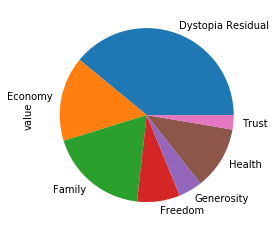

In [0]:
cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

melted = pd.melt(df_2015, id_vars = cols, value_vars = factors)
melted['Percentage'] = round((melted['value']/melted['Happiness Score'])* 100,2)

pv_melted = melted.pivot_table(index = 'variable', values = 'value')
pv_melted.plot(kind = 'pie', y = 'value', legend = False)
plt.plot()

# Trabalhando com Strings com Pandas!



In [0]:
world_dev = pd.read_csv('World_dev.csv')
col_remain = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}
merged = pd.merge(left = df_2015, right = world_dev, how = 'left', left_on= 'Country', right_on= 'ShortName')
merged = merged.rename(col_remain, axis = 1 )
merged

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year,Economy Impact,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region_y,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,Forte,CHE,Switzerland,Switzerland,Switzerland,CH,Swiss franc,NaN,Europe & Central Asia,High income: OECD,CH,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,Forte,ISL,Iceland,Iceland,Republic of Iceland,IS,Iceland krona,NaN,Europe & Central Asia,High income: OECD,IS,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,Forte,DNK,Denmark,Denmark,Kingdom of Denmark,DK,Danish krone,NaN,Europe & Central Asia,High income: OECD,DK,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,Forte,NOR,Norway,Norway,Kingdom of Norway,NO,Norwegian krone,NaN,Europe & Central Asia,High income: OECD,NO,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,Forte,CAN,Canada,Canada,Canada,CA,Canadian dollar,Fiscal year end: March 31; reporting period fo...,North America,High income: OECD,CA,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015

In [0]:
def extract_last_word(element):
   return str(element).split()[-1]
merged['Currency Apply'] = merged['CurrencyUnit'].apply(extract_last_word)
merged

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year,Economy Impact,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region_y,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,Forte,CHE,Switzerland,Switzerland,Switzerland,CH,Swiss franc,NaN,Europe & Central Asia,High income: OECD,CH,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0,franc
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,Forte,ISL,Iceland,Iceland,Republic of Iceland,IS,Iceland krona,NaN,Europe & Central Asia,High income: OECD,IS,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0,krona
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,Forte,DNK,Denmark,Denmark,Kingdom of Denmark,DK,Danish krone,NaN,Europe & Central Asia,High income: OECD,DK,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0,krone
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,Forte,NOR,Norway,Norway,Kingdom of Norway,NO,Norwegian krone,NaN,Europe & Central Asia,High income: OECD,NO,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0,krone
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,Forte,CAN,Canada,Canada,Canada,CA,Canadian dollar,Fiscal year end: March 31; reporting period fo...,North America,High income: OECD,CA,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.

Aprendemos  que devemos usar métodos vetorizados internos (se existirem) em vez do método Series.apply () por razões de desempenho.

Em vez disso, poderíamos dividir cada elemento na coluna CurrencyUnit em uma lista de strings com o método Series.str.split (), o equivalente vetorizado do método string.split () do Python.

De fato, o pandas incorporou vários métodos vetorizados que executam as mesmas operações para seqüências de caracteres em série que os métodos de sequência Python.

Abaixo estão alguns métodos comuns de string vetorizada:



Method	Description
1. Series.str.split() - Divide cada elemento da série.
2. Series.str.strip()	- Remove o espaço em branco de cada string da série.
3. Series.str.lower()	- Converte seqüências de caracteres da série em minúsculas.
4. Series.str.upper()	- Converte seqüências de caracteres da série em maiúsculas.
5. Series.str.get()	- Recupera o i-ésimo elemento de cada elemento da série.
6. Series.str.replace()	 - Substitui uma regex ou sequência na Série por outra sequência.
7. Series.str.cat()	 - Concatena cadeias de caracteres em uma série.
8. Series.str.extract()	- Extrai substrings da série que corresponde a um padrão regex

Nós obtemos acesso a essas métodos adicionando um **str** entre o nome da serie e o método.


```
# Series.str.method_name()
```

O atributo str indica que cada objeto na série deve ser tratado como uma string,sem que seja necessário alterar explicitamente o tipo para uma string, como fizemos ao usar o método apply.




In [0]:
merged['Currency Vectorized'] = merged['CurrencyUnit'].str.split()
merged['Currency Vectorized'] = merged['Currency Vectorized'].str.get(-1)
merged

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year,Economy Impact,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region_y,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,Forte,CHE,Switzerland,Switzerland,Switzerland,CH,Swiss franc,NaN,Europe & Central Asia,High income: OECD,CH,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0,franc,franc
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,Forte,ISL,Iceland,Iceland,Republic of Iceland,IS,Iceland krona,NaN,Europe & Central Asia,High income: OECD,IS,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0,krona,krona
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,Forte,DNK,Denmark,Denmark,Kingdom of Denmark,DK,Danish krone,NaN,Europe & Central Asia,High income: OECD,DK,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0,krone,krone
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,Forte,NOR,Norway,Norway,Kingdom of Norway,NO,Norwegian krone,NaN,Europe & Central Asia,High income: OECD,NO,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0,krone,krone
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,Forte,CAN,Canada,Canada,Canada,CA,Canadian dollar,Fiscal year end: March 31; reporting period fo...,North America,High income: OECD,CA,Original chained constant price data are resca...,2010,Value added at basic prices (VAB),NaN,NaN,Country uses the 2008 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",NaN,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153

A vantagem de utilizar métodos vectorizados, vectorized, é devido a sua performace e por se tornar mais fácil de serem entendidos.

Outro método vectorizado é paraver quais dados estão faltando, para isso utilizamos o Series.isnull(), para ver qual dado está ausente e utilizando com o conjunto sum.



```
# Series.isnull().sum()
```
Retorna o índice de elementos naquela Serie que está ausente!.




In [0]:
merged['CurrencyUnit'].isnull().sum()

13

Ou seja, na coluna CurrencyUnit, temos 13 dados ausentes!

Em seguida, podemos verificar o número de valores ausentes no resultado, definindo o parâmetro dropna no método Series.value_counts () como False


In [0]:
merged['CurrencyUnit'].value_counts(dropna = False)

Euro                         20
NaN                          13
West African CFA franc        6
U.S. dollar                   5
Central African CFA franc     4
                             ..
Russian ruble                 1
Nigerian naira                1
Malagasy ariary               1
Qatari riyal                  1
Malaysian ringgit             1
Name: CurrencyUnit, Length: 115, dtype: int64

Como a Coluna possui cercad e 13 valores ausentes e NaN não aparece na lista de valores únicos, então não devemos trata-los como String.
Como são dados ausentes eles devem ser excluidos!


In [0]:
merged['CurrencyUnit'].value_counts(dropna = True)

Euro                         20
West African CFA franc        6
U.S. dollar                   5
Central African CFA franc     4
New Mozambican metical        1
                             ..
Nigerian naira                1
Malagasy ariary               1
Qatari riyal                  1
Comorian franc                1
Dominican peso                1
Name: CurrencyUnit, Length: 114, dtype: int64

Se queremos encontrar Substrings, ou encontrar palavras específicas em um texto,nós utilizamos para resolver esses problemas uma expressão regular ou Regex.
Regex é uma sequência de caracteres que descrevem um certo padrão, utilizado em Strings!

O pandas já possui expressões regulares integradas em métodos vectorizados e assim extrair padrões mais rápidamente.

Contudo criar expressões regulares é um pouco complexo.

In [0]:
pattern = r"[Nn]ational accounts"
national_accounts = merged['SpecialNotes'].str.contains(pattern)
national_accounts.head()

0     NaN
1     NaN
2     NaN
3     NaN
4    True
Name: SpecialNotes, dtype: object

Outra forma de utilizar Regex é para números aonde precisamos declarar um range de alcançe.

Por exemplo se queremos gerar um regex para o número: 2020


1.   2 - Será entre 1-2 o range
2.   0 - Será entre 0-9 o range
3.   2 - Será entre 0-9
4.   0 - Será entre 0.9


Também podemos índicar uma zona de range para letras:



```
# pattern = r"[a-z]" -> letras minusculas
  pattern = r"[A-Z]" -> letras maisculas
```

Podemos fazer regex mais complexos, tornando mais restritiva o retorno e o nosso regex, por exemplo se queremos buscar uma palavra de três caracteres que começam com um número de 1 - 6 e duas letras quaisquer que sejam a solução seria:



```
# pattern = r"[1-6][a-z][a-z]"
```
Se utilizarmos os { } podemos indicar a repetição desse padrão o número de vezes que queremos.







In [0]:
pattern = r"([1-2][0-9][0-9][0-9])"
years = merged['SpecialNotes'].str.extract(pattern)
years

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
153,2006
154,NaN
155,NaN
156,NaN


Quando utilizamos o str.extract() e utilizamos uma expressão regular em parenteses. O parenteses indica quais são os caracteres que deveram coincidir com os valores que serão extraidos e retornam um novo objeto Series.

Se a captura não existir retorna um NaN.

In [0]:
pattern = r"([1-2][0-9]{3})"
years = merged['SpecialNotes'].str.extract(pattern, expand = True)
years

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
153,2006
154,NaN
155,NaN
156,NaN


Podemos também utilizar o método str.extractall() que vai procurar de acordo com o padrão em todo objeto Series que queremos.


In [0]:
pattern = r"(?P<Years>[1-2][0-9]{3})"
years = merged['IESurvey'].str.extractall(pattern)
years

,,Years
,match,
0,0,2004
1,0,2010
2,0,2010
3,0,2010
4,0,2010
...,...,...
152,0,2008
153,0,2010
154,0,2011


Para extrairmos mais do que um grupo no mesmo objeto Series, basta utilizamos **/** no pattern.

In [0]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"
years = merged['IESurvey'].str.extractall(pattern)
first_two_year = years['First_Year'].str[0:2]
years['Second_Year'] = first_two_year + years['Second_Year']
years

,,First_Year,Second_Year
,match,,
0,0,2004,NaN
1,0,2010,NaN
2,0,2010,NaN
3,0,2010,NaN
4,0,2010,NaN
...,...,...,...
152,0,2008,NaN
153,0,2010,2011
154,0,2011,2012


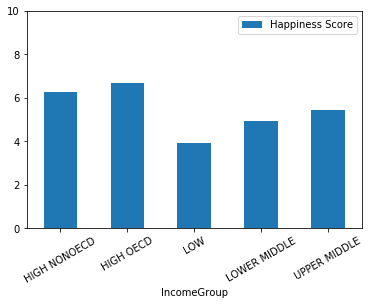

#Trabalhando com Ausência de dados ou dados duplicados
Agora vamos trabalhar com a parte principal na limpeza e tratamento de dados, que é O QUE FAZEER QUANDO ESTAMOS LINDANDO COM DADOS AUSÊNTES OU DUPLICADOS?

Dados ausêntes ou duplicados ocorrem em qualquer dataset, por diferentes razões,como por exemplo na combinação de dados, reindexação.
Outros por exemplo pode ocorrer por erro do usuário, conversão de valores errados etc.

Para isso vamos utilizar os dados, sobre o índice de felicidade entre 2015 a 2017.


In [231]:
import pandas as pd
import numpy as np

df_2015 = pd.read_csv('wh_2015.csv')
df_2016 = pd.read_csv('wh_2016.csv')
df_2017 = pd.read_csv('wh_2017.csv')

print('O formato do arquivo no ano de 2015 é:' + str(df_2015.shape))

print('O formato do arquivo no ano de 2016 é:' + str(df_2016.shape))


print('O formato do arquivo no ano de 2017 é:' + str(df_2017.shape))

O formato do arquivo no ano de 2015 é:(164, 13)
O formato do arquivo no ano de 2016 é:(164, 14)
O formato do arquivo no ano de 2017 é:(164, 13)


Se observarmos todos os dados possuem estruturas diferentes de formatos.

No pandas, a representação de ausência de dados é pelo valor NaN ou pelo None.
No entanto, é bom observar que o pandas não identificar esses valores automaticamente como o NaN, None, mas ele pode indiciar a ausência dos dados.

Quando temos certeza que os dataset foi lido corretamente, podemos utilizar o método Series.isnull() para identificar colunas com valores faltando. 

In [232]:
missing = df_2015['Happiness Score'].isnull()
df_2015[missing]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


Esses são os dados que estão ausentes, contudo é um pouco díficil visualizar. Para isso é melhor visualizar um resumo dos valores ausentes para isso, utilizamos o:


```
# dataframe.isnull().sum()
```



In [233]:
df_2015.isnull().sum()

Country                          0
Region                           6
Happiness Rank                   6
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64

O resultado é uma objeto Series que contém:


*   O índice que contém os nomes das colunas no dataframe
*   E os valores correspondentes aos valores ausênte.

Por exemplo no dataframe acima, apenas Country e Year não possui valores ausêntes!



In [234]:
df_2016.isnull().sum()

Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64

In [235]:
df_2017.isnull().sum()

Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64

Vamos utilizar o seguinte workflow no processo de limpeza e tratamento de dados:

1.   Verificar se erros ocorreram no processo de transformação de dados
2.   Usar dados de fontes adicionais para preencher os valores ausentes.
3.   Remover colunas, ou linhas.
4. Preencher vamos ausentes com estimativar razoáveis.


Vamos agora, combinar nossos 3 dataframes e verificar o conjunto de dados ausentes.

In [236]:
combined = pd.concat([df_2015, df_2016, df_2017], ignore_index = True)
combined.isnull().sum()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


Country                            0
Dystopia Residual                177
Dystopia.Residual                337
Economy (GDP per Capita)         177
Economy..GDP.per.Capita.         337
Family                            22
Freedom                           22
Generosity                        22
Happiness Rank                   177
Happiness Score                  177
Happiness.Rank                   337
Happiness.Score                  337
Health (Life Expectancy)         177
Health..Life.Expectancy.         337
Lower Confidence Interval        335
Region                           177
Standard Error                   334
Trust (Government Corruption)    177
Trust..Government.Corruption.    337
Upper Confidence Interval        335
Whisker.high                     337
Whisker.low                      337
Year                               0
dtype: int64

In [237]:
combined.shape

(492, 23)

Podemos dividir nosso conjunto de dados ausêntes em duas catégorias:


*   177 Dos dados estão ausentes (Cerca de 1/3 de valores totais)
*   377 Dos dados estão ausentes (Cerca de 2/3 dos valores totais)


Você também deve ter notado que alguns dos nomes das colunas diferem apenas pela pontuação, o que causou a combinação incorreta dos quadros de dados:


```
# Trust (Government Corruption)
Trust..Government.Corruption.
```
Para isso vamos remover esses erros e deixar as colunas em maisculo.





In [0]:
df_2015.columns = df_2015.columns.str.replace('.', ' ').str.replace(r'[\(\)]', '').str.strip().str.upper()

df_2016.columns = df_2016.columns.str.replace('.', ' ').str.replace(r'[\(\)]', '').str.strip().str.upper()
df_2017.columns = df_2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()

In [241]:
df_2017

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,WHISKER HIGH,WHISKER LOW,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,GENEROSITY,TRUST GOVERNMENT CORRUPTION,DYSTOPIA RESIDUAL,YEAR
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3.0,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4.0,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5.0,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
160,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
161,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
162,Suriname,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017


In [242]:
combined = pd.concat([df_2015, df_2016, df_2017], ignore_index = True)
missing = combined.isnull().sum()
missing

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
REGION                         177
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
dtype: int64

Corrigimos alguns dos valores ausentes, corrigindo os nomes das colunas. Observe que poderíamos ter realizado o processo de limpeza das colunas sem alterar a capitalização. É uma boa prática, no entanto, tornar a capitalização uniforme, porque uma letra maiúscula ou minúscula perdida pode ter reintroduzido os valores ausentes.

Nós podemos entender um pouco mais sobre os valores ausentes atráves de um mapa de calor ou heatmap.
O heatmap basicamente consiste na representação gráfica dos valores do nosso dataframe representado como cores.


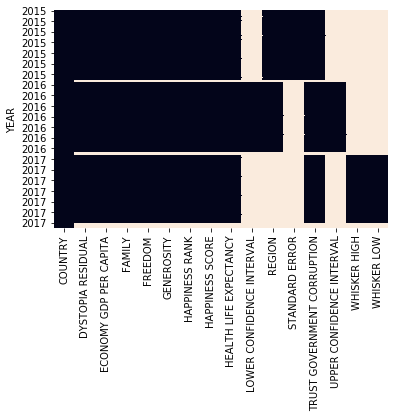

In [243]:
import seaborn as sns
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar = False)

Para entender essa visualização, imagine que pegamos combinados, realçamos os valores ausentes em cinza claro e todos os outros valores em preto e depois o reduzimos para que fosse possível visualizar facilmente todo o quadro de dados de uma só vez.

Já que juntamos todos os dataframes, note que o  terço superior do quadro de dados corresponde aos dados de 2015, o segundo terço corresponde aos dados de 2016 e o ​​terço inferior corresponde aos dados de 2017.

Podemos observar que:


*   A coluna 'COUNTRY' não apresenta nenhum valor ausente
*   Todos os anos possuem valores ausentes menos a coluna Country
*   Algumas colunas têm apenas dados preenchidos por um ano.
*   A coluna Region possui dados ausentes no ano de 2017. (Vamos verificar isso)



In [244]:
region_2017 = combined[combined['YEAR'] == 2017]['REGION']
region_2017.isnull().sum()

164

In [245]:
region_2015 = combined[combined['YEAR'] == 2015]['REGION']
region_2015.isnull().sum()


6

In [246]:
region_2016 = combined[combined['YEAR'] == 2016]['REGION']
region_2016.isnull().sum()

7

Percebemos que o ano de 2017 é que mais possui valores ausentes.
Antes de eliminar ou substituir qualquer valor, vamos primeiro ver se há uma maneira de usar outros dados disponíveis para corrigir os valores.

1.   Verificar se erros ocorreram no processo de transformação de dados
2.   Usar dados de fontes adicionais para preencher os valores ausentes.
3.   Remover colunas, ou linhas.
4. Preencher vamos ausentes com estimativar razoáveis.

Para realizar o processo de tratar esses valores ausentes temos que entender que, no nosso caso. Que cada Ano temos os mesmos páises, como as regiões de cada país tem valores fixos podemos atribuir a região de 2015 ou 2016 à 2017.

Para isso, precisamos seguir essa estratégia:
1. Criar um novo dataframe dos países e suas regiões correspondentes de 2015 e 2016.
2. Utilizar o pd.merge() e atribuir a uma região.
3. O resultado terá duas colunas de região - a coluna original com valores ausentes será nomeada REGION_x. A coluna atualizada sem valores ausentes será nomeada REGION_y. Soltaremos REGION_x para eliminar a confusão.


In [0]:
regions_15 = df_2015[['COUNTRY', 'REGION']].dropna()
regions_16 = df_2016[['COUNTRY', 'REGION']].dropna()


In [248]:
region = pd.concat([regions_15, regions_16], axis = 0)
region = region.drop_duplicates()
region

,COUNTRY,REGION
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America
...,...,...
51,Belize,Latin America and Caribbean
75,Somalia,Sub-Saharan Africa
96,Somaliland Region,Sub-Saharan Africa
112,Namibia,Sub-Saharan Africa


In [249]:
new_df = pd.merge(left = combined, right = regions, on = 'COUNTRY', how = 'left')
new_df = new_df.drop('REGION_x', axis = 1)
missing = new_df.isnull().sum()
missing

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
REGION                         177
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
REGION_y                        18
dtype: int64

Nós utilizamos os dados de 2015 e 2016 para preencher os dados de 2017.
Observe que renomeamos a coluna da região corrigida para REGION separadamente.

Se queremos verificar se os dados estão duplicados, utilizamos o método:


```
# Dataframe.duplicated()
```
Esse método não leva nenhum parâmetro, ele observa os dados duplicados em todo o dataframe.



In [250]:
df_2015.duplicated().sum()

0

In [251]:
df_2016.duplicated().sum()

0

Como devemos ter apenas um país para cada ano, podemos ser um pouco mais detalhados definindo linhas com APENAS o mesmo país e ano como duplicados. Para fazer isso, vamos passar uma lista dos nomes das colunas COUNTRY e YEAR para o método df.duplicated ():

In [252]:
duplicated = new_df.duplicated(['COUNTRY', 'YEAR'])
new_df[duplicated]

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,REGION,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION_y


Como o dataframe está vazio, sabemos que não existe dados dúplicados (Com o mesmo país e ano).

Vale notar que o método df.duplicated() SÓ VAI OLHAR QUANDO FOREM EXATOS OS TERMOS!!
Por exemplo, se não utilizamos palavras maiúsculas então o método não será possível identificar palavras ou termos duplicados.

In [253]:
new_df['COUNTRY'] = new_df['COUNTRY'].str.upper()

duplicates = new_df.duplicated(['COUNTRY', 'YEAR'])
new_df[duplicates]

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,REGION,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION_y
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,NaN
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


Vemos que temos diversos SOMALIALAND REGION,duplicado no nosso dataset, para remover isso utilizamos o método:



```
# df.drop_duplicates()
```
Como o método df.duplicated() o método drop_duplicates vai definir colunas duplicadas que tenham os mesmos valores.

Vale notar que por padrão, o método drop_duplicates() mantém apenas primeira coluna duplicada! Se queremos manter a última, utilizamos o parâmetro **keep** ser igual a **'last'**.





In [254]:
new_df['COUNTRY'] = new_df['COUNTRY'].str.upper()
new_df = new_df.drop_duplicates(['COUNTRY', 'YEAR'])
new_df

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,REGION,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION_y
0,SWITZERLAND,2.51738,1.39651,1.34951,0.66557,0.29678,1.0,7.587,0.94143,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN,2015,Western Europe
1,ICELAND,2.70201,1.30232,1.40223,0.62877,0.43630,2.0,7.561,0.94784,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN,2015,Western Europe
2,DENMARK,2.49204,1.32548,1.36058,0.64938,0.34139,3.0,7.527,0.87464,NaN,Western Europe,0.03328,0.48357,NaN,NaN,NaN,2015,Western Europe
3,NORWAY,2.46531,1.45900,1.33095,0.66973,0.34699,4.0,7.522,0.88521,NaN,Western Europe,0.03880,0.36503,NaN,NaN,NaN,2015,Western Europe
4,CANADA,2.45176,1.32629,1.32261,0.63297,0.45811,5.0,7.427,0.90563,NaN,North America,0.03553,0.32957,NaN,NaN,NaN,2015,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,OMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Middle East and Northern Africa
487,PUERTO RICO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN
490,SURINAME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Latin America and Caribbean


Agora que já lidamos com valores duplicados, vamos lidar com valores ausêntes.

Muitos dos métodos na biblioteca do pandas são projetados para excluir valores ausentes sem remove-los, portanto podemos deixar os valores que faltam dependendo da pergunta que estamos fazendo.

Contudo, deixar esses valores podem causar problemas sejam de distribuição no dataset ou de responder outras perguntas.

Vale destacar que lidar com valores ausentes em modelos de Machine Learning pode causar um problema danado!

Para confirmar quais colunas possuem valores ausentes basta utilizar o método:



```
# df.isnull().sum()
```




In [218]:
new_df.isnull().sum()
new_df

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,LOWER CONFIDENCE INTERVAL,REGION,STANDARD ERROR,TRUST GOVERNMENT CORRUPTION,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,YEAR,REGION_y
0,SWITZERLAND,2.51738,1.39651,1.34951,0.66557,0.29678,1.0,7.587,0.94143,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN,2015,Western Europe
1,ICELAND,2.70201,1.30232,1.40223,0.62877,0.43630,2.0,7.561,0.94784,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN,2015,Western Europe
2,DENMARK,2.49204,1.32548,1.36058,0.64938,0.34139,3.0,7.527,0.87464,NaN,Western Europe,0.03328,0.48357,NaN,NaN,NaN,2015,Western Europe
3,NORWAY,2.46531,1.45900,1.33095,0.66973,0.34699,4.0,7.522,0.88521,NaN,Western Europe,0.03880,0.36503,NaN,NaN,NaN,2015,Western Europe
4,CANADA,2.45176,1.32629,1.32261,0.63297,0.45811,5.0,7.427,0.90563,NaN,North America,0.03553,0.32957,NaN,NaN,NaN,2015,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,OMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Middle East and Northern Africa
487,PUERTO RICO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN
490,SURINAME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Latin America and Caribbean


Podemos perceber que temos algumas colunas com mais de 300 dados ausentes.
Vamos analisar essas colunas já que apresentam maior índice de dados faltando.

Quando estamos pensando em qual coluna vamos remover, temos que pensar cuidadosamente que tipo de informação vamos perder, ao ínves de falarmos, que dependendo de uma porcentagem x% de dados ausentes nós removemos essa coluna.
É melhor realizarmos duas perguntas:

1.   Esse dado que está ausente é  necessario para responder meus objetivos?
2.   Como vamos remover ou substituir esses valores refletem em nossa análise.

Em nosso caso, queremos ver o índice de felicidade e os fatores que contribuem para isso.


Como os valores ausentes compõem mais da metade das colunas a seguir e não precisamos deles para atingir nossa meta final, vamos eliminá-los:


*  STANDARD ERROR
*  LOWER CONFIDENCE INTERVAL
*  UPPER CONFIDENCE INTERVAL
*  WHISKER HIGH
*  WHISKER LOW

Para remover, basta utilizar o método:
DataFrame.drop()




In [255]:
cols_drop = ['STANDARD ERROR', 'LOWER CONFIDENCE INTERVAL', 'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW']

new_df = new_df.drop(cols_drop, axis = 1)
new_df.isnull().sum()

COUNTRY                          0
DYSTOPIA RESIDUAL               19
ECONOMY GDP PER CAPITA          19
FAMILY                          19
FREEDOM                         19
GENEROSITY                      19
HAPPINESS RANK                  19
HAPPINESS SCORE                 19
HEALTH LIFE EXPECTANCY          19
REGION                         174
TRUST GOVERNMENT CORRUPTION     19
YEAR                             0
REGION_y                        17
dtype: int64

Se tiver trabalhando com um conjunto de dados muito grandes, pode utilizar o método:



```
# Dataframe.dropna()
```
Por padrão o dropna, remove qualquer coluna com valores ausentes.

Para eliminar colunas, colocamos o parâmetro axis = 1.

No entanto, isso resultaria no descarte de colunas com valores ausentes - queremos apenas o descarte de determinadas colunas. Em vez disso, também podemos usar o parâmetro thresh para descartar apenas colunas se elas contiverem abaixo de um determinado número de valores não nulos.

Até agora utilizamos apenas, o método 
df.isnull() para confirma o número de dados que faltam. Para confirmar o número de dados QUE NÃO FALTAM, podemos usar:



```
# df.notnull()
```







In [256]:
new_df.notnull().sum()

COUNTRY                        489
DYSTOPIA RESIDUAL              470
ECONOMY GDP PER CAPITA         470
FAMILY                         470
FREEDOM                        470
GENEROSITY                     470
HAPPINESS RANK                 470
HAPPINESS SCORE                470
HEALTH LIFE EXPECTANCY         470
REGION                         315
TRUST GOVERNMENT CORRUPTION    470
YEAR                           489
REGION_y                       472
dtype: int64

Agpora vamos eliminar os dados que contem cerca de 159 ou menos que valores ausentes.

In [257]:
new_df = new_df.dropna(thresh = 159, axis = 1)
new_df.isnull().sum()

COUNTRY                          0
DYSTOPIA RESIDUAL               19
ECONOMY GDP PER CAPITA          19
FAMILY                          19
FREEDOM                         19
GENEROSITY                      19
HAPPINESS RANK                  19
HAPPINESS SCORE                 19
HEALTH LIFE EXPECTANCY          19
REGION                         174
TRUST GOVERNMENT CORRUPTION     19
YEAR                             0
REGION_y                        17
dtype: int64

Para ter uma decisão sobre o que fazer com os dados ausentes, precisamos saber se é melhor manter as colunas/linhas ou substituir por outros valores.

A segunda pergunta que fizemos ali em cima é, como substituindo esses valores vão afetar a nossa análise.
Para isso vamos fazer algumas perguntas mais específicas:


1.   Qual a porcentagem de dados ausentes?
2.   Removendo essas dados, quais outras informações estamos perdendo?
3. Podemos identificar algum padrão nos dados que faltam?

Respondendo as perguntas:
1.  *Qual a porcentagem de dados ausentes?*
  Quando utilizamos o new_df.isnull().sum(), percebemos que cerca de apenas 19 dados estão em ausentes, cerca de 4%. De um modo geral, quanto menor a porcentagem de valores ausentes, menor a probabilidade de que eles caiam afetará significativamente a análise.

2. *Removendo essas dados, quais outras informações estamos perdendo?* 
Para responder essa pergunta, vamos utilizar o heatmap.


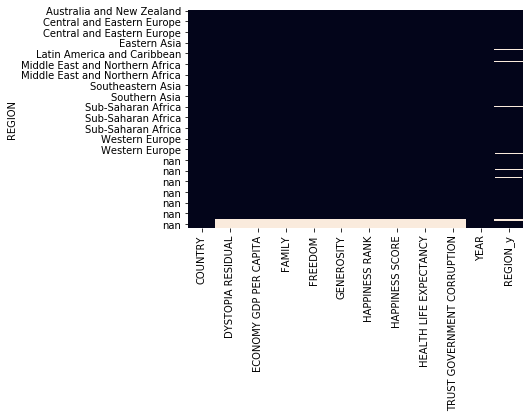

In [278]:
sorted = new_df.set_index('REGION').sort_values(['REGION', 'HAPPINESS SCORE'])
sns.heatmap(sorted.isnull(), cbar=False)

No heatmap acima, os valores ausentes são representados em cinza claro e todos os outros valores em preto. A partir dessa visualização, podemos confirmar que, se os dados estão ausentes, estão faltando em quase todas as colunas. Concluiremos que a eliminação dos valores ausentes não nos fará perder informações valiosas em outras colunas.


3. *Podemos identificar algum padrão nos dados que faltam?* No gráfico acima, percebemos que as regiões Sub-Saharan, Middle East and Northern Africa e Latin America.


A região da Africa Sub-Saharan contém os valores mais ausentes, representando cerca de 9% dos valores dessa região. Como gostaríamos de analisar os dados de acordo com a região, também devemos pensar em como esses valores afetam especificamente a análise para essa região.

Se queremos tratar esses valores ausentes, a melhor forma é substituir esses valores com estimativa de valores da mesma coluna, que é chamado de imputation.

Temos algumas opções para substituir:

* Um valor Constante
* A média daquela coluna
* A mediana daquela coluna
* A moda daquela coluna.

Para valores não númericos, é com substituirmos esses valroes com uma String chamada 'Unknown' ou desconhecido.

Para colunas númericas, a forma mais comum é substituir com a média dos valores daquela coluna. Contudo é bom entender qual tipo de dado é presente naquela coluna, por exemplo se for uma coluna de inteiros talvez a média não seja uma boa alternativa, a moda pode ser melhor.

Primeiro, vamos criar uma intuição sobre essa técnica através de substituir esses valores com a média da distribuição.
Para isso isso utilizamos o método Series.fillna() para substituir os valores pela média.

Por exemplo, se queremos substituir todos os valores da coluna HAPPINESS SCORE com 0 basta.



```
# new_df[`HAPPINESS SCORE`].fillna(0)
```





In [281]:
happy_mean = new_df['HAPPINESS SCORE'].mean()
new_df['HAPPINESS SCORE UPDATED'] = new_df['HAPPINESS SCORE'].fillna(happy_mean)
new_df

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,REGION,TRUST GOVERNMENT CORRUPTION,YEAR,REGION_y,HAPPINESS SCORE UPDATED
0,SWITZERLAND,2.51738,1.39651,1.34951,0.66557,0.29678,1.0,7.587,0.94143,Western Europe,0.41978,2015,Western Europe,7.587000
1,ICELAND,2.70201,1.30232,1.40223,0.62877,0.43630,2.0,7.561,0.94784,Western Europe,0.14145,2015,Western Europe,7.561000
2,DENMARK,2.49204,1.32548,1.36058,0.64938,0.34139,3.0,7.527,0.87464,Western Europe,0.48357,2015,Western Europe,7.527000
3,NORWAY,2.46531,1.45900,1.33095,0.66973,0.34699,4.0,7.522,0.88521,Western Europe,0.36503,2015,Western Europe,7.522000
4,CANADA,2.45176,1.32629,1.32261,0.63297,0.45811,5.0,7.427,0.90563,North America,0.32957,2015,North America,7.427000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,OMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Middle East and Northern Africa,5.370728
487,PUERTO RICO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,5.370728
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,5.370728
490,SURINAME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Latin America and Caribbean,5.370728


combined.pivot_table(index='REGION', values='HAPPINESS SCORE', margins=True)

In [282]:
new_df.pivot_table(index='REGION', values='HAPPINESS SCORE', margins=True)

,HAPPINESS SCORE
REGION,
Australia and New Zealand,7.304250
Central and Eastern Europe,5.351810
Eastern Asia,5.625167
Latin America and Caribbean,6.122283
Middle East and Northern Africa,5.396744
North America,7.263500
Southeastern Asia,5.328167
Southern Asia,4.572071
Sub-Saharan Africa,4.170462


Se queremos realizar um gráfico com as distribuições antes e depois da substituição dos dados pela média, temos que observar o formato da distribuição, se ela altera à medida que os valores se agrupam em torno da média.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


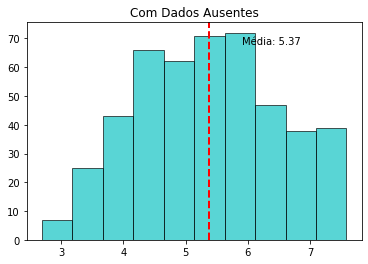

In [290]:
result = plt.hist(new_df['HAPPINESS SCORE'], color='c', edgecolor='k', alpha=0.65)
plt.axvline(happy_mean, color='red', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(happy_mean*1.1, max_ylim*0.9, 'Média: {:.2f}'.format(happy_mean))
plt.title('Com Dados Ausentes')
plt.show()

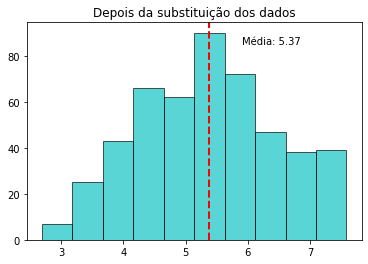

In [291]:
result = plt.hist(new_df['HAPPINESS SCORE UPDATED'], color='c', edgecolor='k', alpha=0.65)
plt.axvline(happy_mean, color='red', linestyle='dashed', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(happy_mean*1.1, max_ylim*0.9, 'Média: {:.2f}'.format(happy_mean))
plt.title('Depois da substituição dos dados')
plt.show()

Como decidimos usar essa abordagem, devemos fazer as seguintes perguntas - as pontuações de felicidade ausentes provavelmente estão próximas da média? Ou é mais provável que as pontuações sejam muito altas ou muito baixas? Se os valores ausentes estiverem extremos, a média não será uma boa estimativa para eles.


Quando visualizamos os dados ausentes, determinamos que a região da África Subsaariana continha os valores mais ausentes. Como gostaríamos de analisar os dados de acordo com a região, vamos examinar mais de perto os meios para cada região:

In [294]:
new_df.pivot_table(index='REGION', values='HAPPINESS SCORE', margins=True)

,HAPPINESS SCORE
REGION,
Australia and New Zealand,7.304250
Central and Eastern Europe,5.351810
Eastern Asia,5.625167
Latin America and Caribbean,6.122283
Middle East and Northern Africa,5.396744
North America,7.263500
Southeastern Asia,5.328167
Southern Asia,4.572071
Sub-Saharan Africa,4.170462


O Termo All no gráfico acima, representa a média da felicidade de todos os países do mundo.
Percebemos que a mdia é maior que cerca 1.2 em relação a média da Sub-Saharan Africa.


Além disso, se pensarmos nas razões pelas quais um país pode não ter participado da pesquisa de felicidade - guerra, desastre natural etc. - muitos deles provavelmente resultariam em uma pontuação de felicidade menor do que a média da região. Concluiremos que a média para o mundo inteiro não seria uma boa estimativa para eles.

In [295]:
new_df = new_df.dropna()
new_df.isnull().sum()

COUNTRY                        0
DYSTOPIA RESIDUAL              0
ECONOMY GDP PER CAPITA         0
FAMILY                         0
FREEDOM                        0
GENEROSITY                     0
HAPPINESS RANK                 0
HAPPINESS SCORE                0
HEALTH LIFE EXPECTANCY         0
REGION                         0
TRUST GOVERNMENT CORRUPTION    0
YEAR                           0
REGION_y                       0
HAPPINESS SCORE UPDATED        0
dtype: int64